In [0]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [7]:
cd "/content/drive/My Drive/Colab Notebooks/matrix/matrix_two/dw_matrix_car"

/content/drive/My Drive/Colab Notebooks/matrix/matrix_two/dw_matrix_car


In [4]:
ls

data/  LICENSE  README.md


In [8]:
ls data/car.h5

data/car.h5


In [9]:
df = pd.read_hdf('data/car.h5')
df.shape

(106494, 155)

In [5]:
!pip install --upgrade tables

Requirement already up-to-date: tables in /usr/local/lib/python3.6/dist-packages (3.6.1)


In [10]:
df.columns.values

array(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       'feature_kurtyny-powietrzne', 'feature_klimatyzacja-dwustrefowa',
       'feature_światła-led', 'feature_czujnik-zmierzchu',
       'feature_elektrycznie-ustawiane-lusterka',
       'feature_asr-(kontrola-trakcji)',
       'feature_poduszka-powietrzna-kierowcy', 'feature_cd',
       'feature_elektryczne-szyby-przednie',
       'feature_poduszka-powietrzna-pasażera',
       'feature_system-start-stop', 'feature_światła-do-jazdy-dziennej',
       'feature_komputer-pokładowy', 'feature_elektryczne-szyby-tylne',
       'feature_klimatyzacja-manualna', 'feature_tapicerka-welurowa',
       'feature_czujnik-deszczu', 'feature_światła-przeciwmgielne',
       'feature_ogrzewanie-postojowe', 'feature_radio-niefabryczne',
       'feature_regulowane-zaw

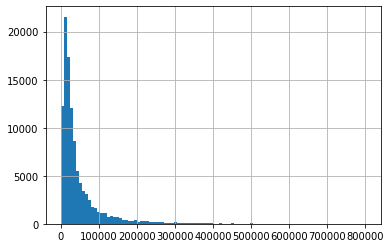

In [11]:
df['price_value'].hist(bins=100);

In [13]:
df['price_value'].describe()

count    106494.000000
mean      47534.137437
std       66308.716918
min         400.000000
25%       13890.000000
50%       25500.000000
75%       52900.000000
max      799900.000000
Name: price_value, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8bc10c240>,
      dtype=object)

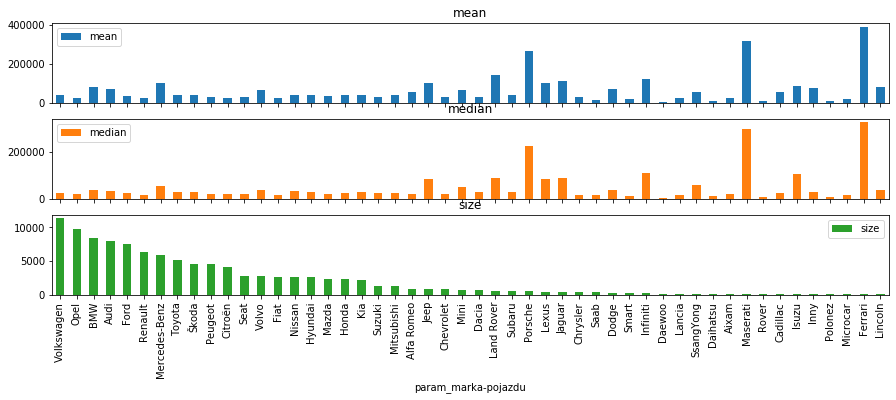

In [31]:

(
  df
  .groupby('param_marka-pojazdu')['price_value']
  .agg([np.mean,np.median,np.size])
  .sort_values(by='size',ascending=False)
  .head(50)
).plot(kind='bar', figsize=(15,5),subplots=True)

In [0]:
def group_and_barplot(feat_gropuby, feat_agg='price_value', agg_funcs=[np.mean, np.median, np.size], feat_sort='mean', top=50, subplots=True):
  return (
      df
      .groupby(feat_gropuby)[feat_agg]
      .agg(agg_funcs)
      .sort_values(by=feat_sort,ascending=False)
      .head(top)
  ).plot(kind='bar', figsize=(15,5),subplots=subplots)

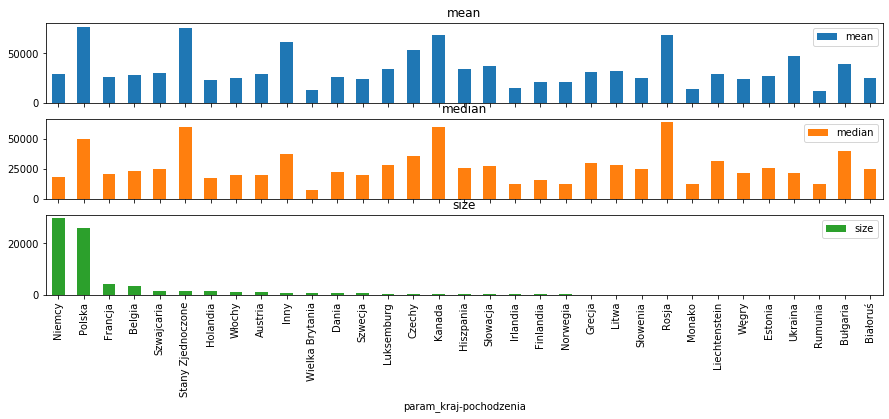

In [42]:
group_and_barplot('param_kraj-pochodzenia', feat_sort='size');

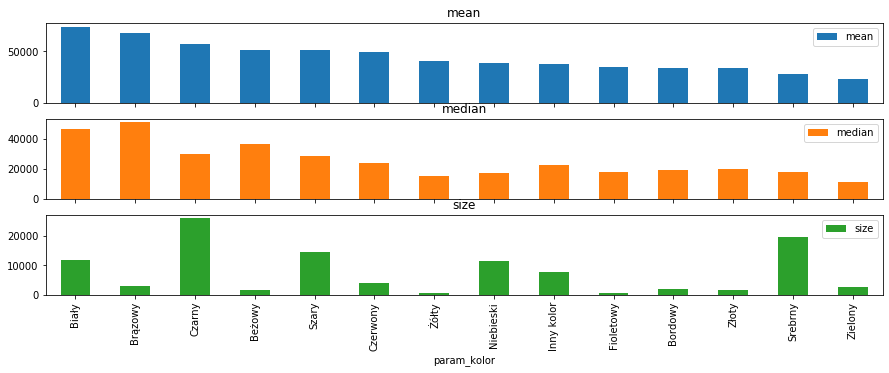

In [44]:
group_and_barplot('param_kolor', feat_sort='mean');